In [8]:
import os
import wandb
import torch
import numpy as np
import torch.nn as nn
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets import ImageFolder
import torchvision.transforms as tt
from torchvision.utils import save_image
from torchvision.utils import make_grid
from PIL import Image
import torchvision.utils as vutils

from model import Generator
from config import config as cfg

In [3]:
!python train.py

wandb: Currently logged in as: tesareon. Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.14.1
wandb: Run data is saved locally in /content/wandb/run-20230405_183800-778kllu2
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run borg-tanagra-41
wandb: ⭐️ View project at https://wandb.ai/tesareon/CSPGAN
wandb: 🚀 View run at https://wandb.ai/tesareon/CSPGAN/runs/778kllu2
[0/1][0/792]	Loss_D: 5.0548	Loss_G: 2.1515	D(x): 0.5131	D(G(z)): 0.4831 / 0.1478
[0/1][50/792]	Loss_D: 0.4465	Loss_G: 3.3827	D(x): 0.8039	D(G(z)): 0.0476 / 0.0457
[0/1][100/792]	Loss_D: 0.9245	Loss_G: 3.0914	D(x): 0.7944	D(G(z)): 0.3799 / 0.0553
[0/1][150/792]	Loss_D: 1.3870	Loss_G: 1.6845	D(x): 0.3484	D(G(z)): 0.0799 / 0.2113
[0/1][200/792]	Loss_D: 1.2264	Loss_G: 2.2518	D(x): 0.7924	D(G(z)): 0.5367 / 0.1208
[0/1][250/792]	Loss_D: 0.9375	Loss_G: 2.2763	D(x): 0.7814	D(G(z)): 0.4239 / 0.1147
[0/1][300/792]	Loss_D: 1.0019	Loss_G: 1.7986	D(x): 0.5645	D(G(z)): 0.2351 / 0.1841


In [ ]:
generator = Generator(cfg['latent_size']).cuda()
checkpoint = torch.load('csp_gan.pth.tar')
generator.load_state_dict(checkpoint['generator_state_dict'])

In [50]:
fixed_noise = torch.randn(32, cfg['latent_size'], device='cuda:0')

with torch.no_grad():
    fake = generator(fixed_noise).detach().cpu()

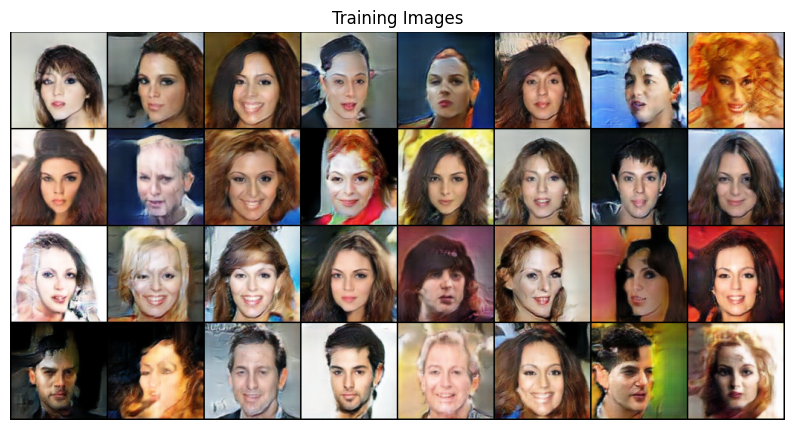

In [40]:
plt.figure(figsize=(10,10))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(fake, padding=2, normalize=True).cpu(),(1,2,0)))